# plot libraries
This notebook demostrates popular plot libraries works properly in lgo.

# wcharczuk/go-chart
- [wcharczuk/go-chart](https://github.com/wcharczuk/go-chart)

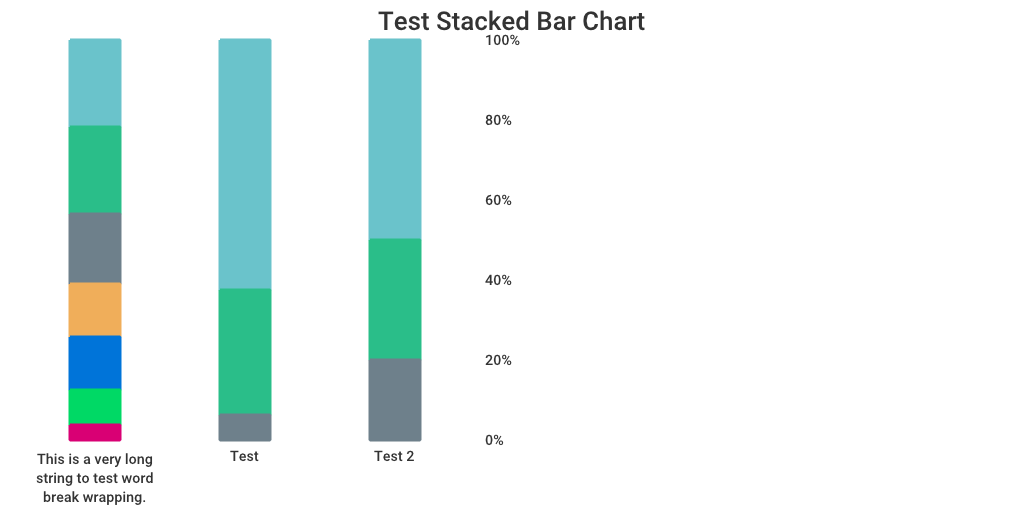

In [ ]:
// This sample is copied from https://github.com/wcharczuk/go-chart/tree/master/_examples/stacked_bar

import (
    "bytes"
    "fmt"

    "github.com/wcharczuk/go-chart"
)

sbc := chart.StackedBarChart{
    Title:      "Test Stacked Bar Chart",
    TitleStyle: chart.StyleShow(),
    Background: chart.Style{
        Padding: chart.Box{
            Top: 40,
        },
    },
    Height: 512,
    XAxis: chart.Style{
        Show: true,
    },
    YAxis: chart.Style{
        Show: true,
    },
    Bars: []chart.StackedBar{
        {
            Name: "This is a very long string to test word break wrapping.",
            Values: []chart.Value{
                {Value: 5, Label: "Blue"},
                {Value: 5, Label: "Green"},
                {Value: 4, Label: "Gray"},
                {Value: 3, Label: "Orange"},
                {Value: 3, Label: "Test"},
                {Value: 2, Label: "??"},
                {Value: 1, Label: "!!"},
            },
        }, {
            Name: "Test",
            Values: []chart.Value{
                {Value: 10, Label: "Blue"},
                {Value: 5, Label: "Green"},
                {Value: 1, Label: "Gray"},
            },
        },
        {
            Name: "Test 2",
            Values: []chart.Value{
                {Value: 10, Label: "Blue"},
                {Value: 6, Label: "Green"},
                {Value: 4, Label: "Gray"},
            },
        },
    },
}
var buf bytes.Buffer
err := sbc.Render(chart.PNG, &buf)
if err != nil {
    fmt.Printf("Error rendering chart: %v\n", err)
    return
}
_ctx.Display.PNG(buf.Bytes(), nil)

# gonum/plot
- [gonum/plot](https://github.com/gonum/plot)

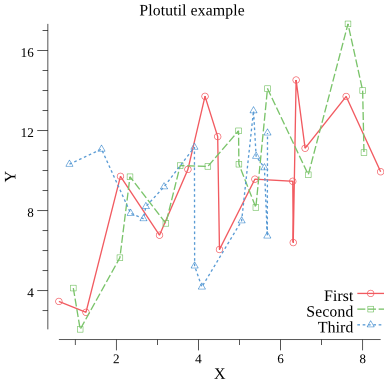

In [ ]:
// This sample is copied from https://github.com/gonum/plot/wiki/Example-plots#plotutil
import (
    "bytes"
    "math/rand"

    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
)

func DisplayPlot(p *plot.Plot) {
    // Save the plot to a PNG file.
    var buf bytes.Buffer
    c, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    _ctx.Display.PNG(buf.Bytes(), nil)
}

// randomPoints returns some random x, y points.
func randomPoints(n int) plotter.XYs {
    pts := make(plotter.XYs, n)
    for i := range pts {
        if i == 0 {
            pts[i].X = rand.Float64()
        } else {
            pts[i].X = pts[i-1].X + rand.Float64()
        }
        pts[i].Y = pts[i].X + 10*rand.Float64()
    }
    return pts
}

{
    p, err := plot.New()
    if err != nil {
        panic(err)
    }
    
    p.Title.Text = "Plotutil example"
    p.X.Label.Text = "X"
    p.Y.Label.Text = "Y"

    err = plotutil.AddLinePoints(
        p,
        "First", randomPoints(15),
        "Second", randomPoints(15),
        "Third", randomPoints(15))
    if err != nil {
        panic(err)
    }

    DisplayPlot(p)
}